In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import hadamard
import cv2
from matplotlib import pylab


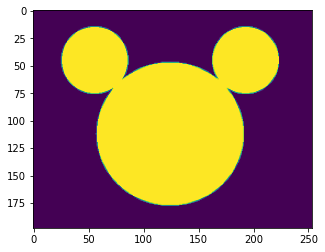

In [2]:
img = cv2.imread(r"C:\Users\pc\Pictures\mickey.png", 0)
plt.imshow(img)

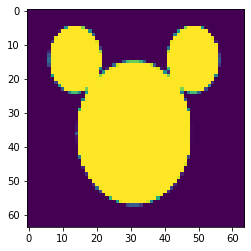

In [3]:
img = cv2.resize(img, (64, 64))
n = 64*64 
plt.imshow(img)



In [4]:

hd = hadamard(n)
hd = hd.reshape([64, 64, n])
hd_plus = (hd + 1)/2
hd_minus = 1 - hd_plus
#hd[:, :, 1] == hd_plus[:, :, 1] - hd_minus[:, :, 1]

Text(0.5, 1.0, 'Hadamard Mickey')

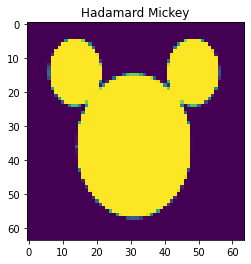

In [5]:
result = np.zeros((64, 64))
int_fluc = []
for i in range(n):
    pos_prod = img*hd_plus[:, :, i]
    bn1 = pos_prod.sum()
    neg_prod = img*hd_minus[:, :, i]
    bn2 = neg_prod.sum()
    d = bn1-bn2     #d is intesity fluctuation or differetial signal
    int_fluc.append(d)
    result += d*(hd_plus[:, :, i])
plt.imshow(result)
plt.title("Hadamard Mickey")



In [6]:
plt.imsave(r"C:\Users\pc\Pictures\results\hadamard_mickey.jpeg", result)

Text(0.5, 1.0, 'Intensity Fluctuation Distribution')

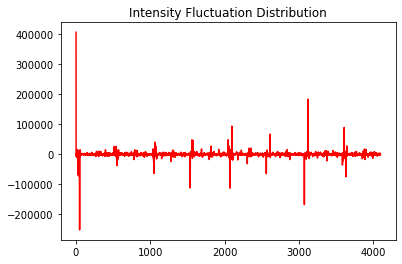

In [7]:
meas = [i for i in range(n)]
plt.plot(meas, int_fluc, "r" )
plt.title("Intensity Fluctuation Distribution")

In [12]:
(img == result).all() #reconstructed image is not exactly object

False